Chuẩn bị các thư viện cần dùng (Prepare for using libraries):


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from LinearModel import *

# Linear Model From Scratch:
## Mở đầu (Preface):
Notebook này tôi xin trình bày về các kiến thức đã học được về các mô hình tuyến tính phổ biến hiện nay, đó là Liner Regression,  Polynomial Regression, Logistic Regression và Softmax Regression, cũng như cách chuẩn hóa mô hình tuyến tính và trình bày giải thuật tối ưu hóa đang được sử dụng rộng rãi là Gradient Descent (Xuống dốc). Phần notebook này không trình bày các kiến thức về SVMs, mặc dù SVM được coi là một mô hình tuyến tính, tuy nhiên tôi sẽ tìm hiểu riêng trong một notebook khác.

(*The contents covering in this notebook include my knowledges about some popular linear models such as Linear Regression, Polynomial Regression, Logistic Regression, and Softmax Regression. This notebook also includes the contents about the Gradient Descent - A optimizing algorithm that be used various nowadays. Note that the SVMs are not presented in this notebook and will be cover in a future notebook*)


## 1 Mô hình Linear Regression (Linear Regression):

### 1.1 Khởi tạo training set (Initialize the training set):

`X` có dạng `(x0, x1)`, ở đây ta lấy `x0 = 0`

`y` có dạng phương trình: $$y = x_0p_0 + x_1p_1$$, với `p0`, `p1` là hệ số của phương trình, `noise` biểu thị độ nhiễu (độ tản mát) của tập dữ liệu

In [2]:
X = 2 * np.random.rand(100, 1)
X_new = np.c_[np.ones((100, 1)), X]
y = X_new.dot(np.array([[4],[3]])) + np.random.randn(100, 1)

X.shape

(100, 1)

Vẽ lược đồ biểu diễn dữ liệu (Draw a figure that represents the data)

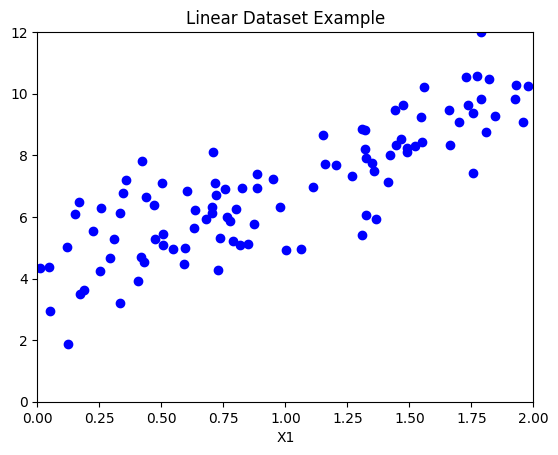

In [3]:
plt.plot(X, y, "ob")
plt.title("Linear Dataset Example")
plt.axis((0, 2, 0, 12))
plt.xlabel("X1")
plt.show()

### 1.2 Huấn luyện mô hình Linear Regression tự chế, sử dụng giải thuật Gradient Descent

#### 1.2.1 Mô hình Linear Regression
Ở đây tôi sử dụng mô hình Linear Regression dạng cơ bản, có công thức là: $$\hat{y} = \theta^T \cdot \bold{x}$$, trong đó:
* $\hat{y}$ là kết quả dự đoán
* $\bold{\theta} = (\theta_0, \theta_1, ... \theta_{n-1})$ là tham số mô hình. Có tất cả n tham số.
* $\bold{x} = (x_0, x_1, x_2, ...x_{m-1})$ là một đối tượng huấn luyện. Mỗi đối tượng huấn luyện có m thuộc tính, trong đó thuộc tính $x_0 = 1$.

Hàm mất mát sử dụng để huấn luyện mô hình là Mean Square Error - MSE:
$$ \text{MSE}(\bold{\theta}) = \frac{1}{m}\sum^m_{i = 1}{(\bold{\theta}^T\cdot\bold{x}_i - \hat{y}_i)^2}$$

#### 1.2.2 Huấn luyện mô hình:

Sử dụng mô hình tự cài đặt để huấn luyện mô hình theo giải thuật Batch Gradient Descent

In [29]:
model = MyLinearRegression(eta = 0.001, tol= 1e-7, save_loss_log=True)
model.fit_with_BGD(X, y)
model.coef

Epoch 0: After Loss = 43.35134228731051
Epoch 1: After Loss = 43.01026270857072
Epoch 2: After Loss = 42.67204222838281
Epoch 3: After Loss = 42.336656819272804
Epoch 4: After Loss = 42.00408265572707
Epoch 5: After Loss = 41.67429611249456
Epoch 6: After Loss = 41.347273762903605
Epoch 7: After Loss = 41.02299237719273
Epoch 8: After Loss = 40.701428920855456
Epoch 9: After Loss = 40.38256055299933
Epoch 10: After Loss = 40.06636462471814
Epoch 11: After Loss = 39.75281867747851
Epoch 12: After Loss = 39.441900441519465
Epoch 13: After Loss = 39.13358783426587
Epoch 14: After Loss = 38.82785895875498
Epoch 15: After Loss = 38.52469210207629
Epoch 16: After Loss = 38.224065733824474
Epoch 17: After Loss = 37.92595850456534
Epoch 18: After Loss = 37.63034924431466
Epoch 19: After Loss = 37.337216961029846
Epoch 20: After Loss = 37.04654083911425
Epoch 21: After Loss = 36.758300237934016
Epoch 22: After Loss = 36.47247469034744
Epoch 23: After Loss = 36.18904390124676
Epoch 24: After Los

array([[2.11202129],
       [4.56812829]])

**Nhận xét**: Sau 162 Epoch thì mô hình tìm được kết quả với hai tham số $\theta_0 = 4.045$ và $\theta_1 = 2.941$, hai kết quả này tương đối sát với tham số thực tế (4,3). 1 Epoch là một lần mô hình duyệt qua toàn bộ tập huấn luyện. 

Dự đoán một giá trị X bất kỳ:

Chọn $X_{test} = 10$, ta tính được kết quả mong muốn khoảng $34$

In [30]:
X_test = np.array([[10]])
model.predict(X_test)

array([[47.79330422]])

Lập đồ thị trực quan đường thằng mô hình:

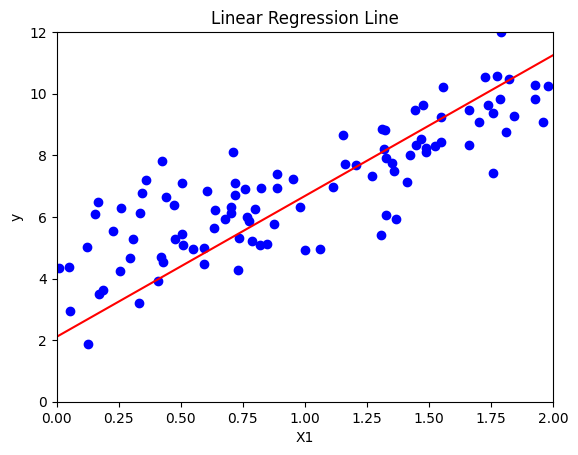

In [31]:
X_pred = np.linspace(0, 2, num=3000)
y_pred = model.predict(X_pred)

plt.plot(X, y, "ob")
plt.plot(X_pred, y_pred.T, "r-")
plt.title("Linear Regression Line")
plt.axis((0, 2, 0, 12))
plt.xlabel("X1")
plt.ylabel("y")
plt.show()

Biểu diễn hàm mất mát thay đổi theo epoch:

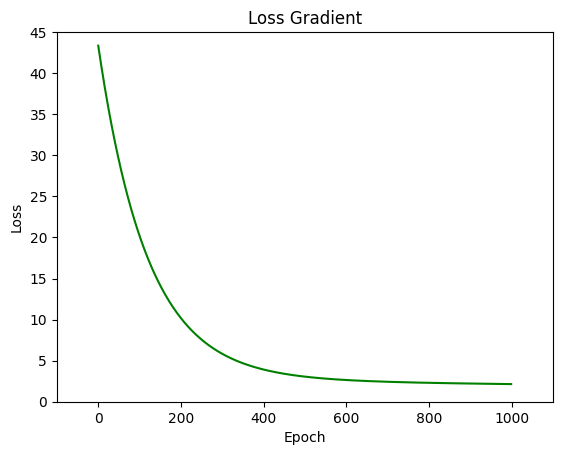

In [39]:
log_loss = model.loss_log
Epochs = [x[0] for x in log_loss]
Loss = [x[1] for x in log_loss]
plt.plot(Epochs, Loss, "g-")
plt.title("Loss")
plt.axis((-100, 1100, 0, 45))
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss Gradient")
plt.show()

**Nhận xét**: Từ đồ thị, nếu tiếp tục huấn luyện có thể đạt được độ chính xác cao hơn